# Influence of a deviating center of light on the uncertainty of photogoniometric measurements


## Introduction to the Center of Light
The Center of Light is a concept that results from the way Luminous Intensity is defined. 
The quantity of luminous intensity allows to express the emitted light with a directional dependency- integrating over any spacial distribution of the light source. This is a desired simplification of reality. The Luminous Intensity itself is a model with the assumption, that the luminous object is a point source. The Center of Light is the link between a real luminous object and this model: It is the point that the object is reduced to. The Center of Light is therefore a property of the luminous object, that has to be taken into account when measuring luminous intensity.

The standard setup for measuring luminous intensity is a farfield goniometer. It uses a detector revolving around the object or vice versa at a constant distance. A luminous intensity distribution (LID) is constructed from multiple measurements performed for different directions relative to the center of the machine. For every measured direction it samples the illumincance caused by the source at this distance and derives from it the luminous intensity. This measurement setup assumes point source in the center of the machine.
The Model is implicitly used, but the actual object position is up to the user. The Center of Light of the luminous object is generally unknown, this opens up the possibility to introduce an error from the placement of the object. 

There is an inherent error resulting from the size of the object. This has been explored under the topic of the limiting photometric distance. (link) This Error has the same underlying root as the error from translated Center of Light: Light coming from places other than the assumed point location. This results in deviating measurement distances and angles for different measurement directions. The unknown luminance characteristic of the object leads to a uncertainty contribution that cannot be prevented. Instead the measurement distance is increased to reduce uncertainty to a acceptable margin. 
There are good tools and rules of thumb in place to estimate this uncertainty. (link)
In contrast, the Center of Light is not taken into account at all.
Therefore the aim is to sensitize operators to the problems arising from Center of Light.
Most importantly this factor can be integrated into a uncertainty analysis by expressing the confidence in the position of the source.

## Impact for a LID measurement
How the object is placed and oriented can be described by a pose in the coordinate system of the goniometer, consisting of two components: rotation and translation. The rotation of the object is normally dictated by the measurement procedure. A desired orientation could be to align optical axis of the object to a certain direction in goniometer coordinates.
The effect of deviating rotation has already been investigated. (Link)
Changing the rotation of the object in the goniometer in turn results in a rotated LID. As long as the region of interest is still inside the sampled solid angle, there is no loss of information. And a LID with the desired rotation can be calculated after the measurement. Another work examined the possiblity to compare LID measurements of the same or similar objects with different rotations. This can be acomplished by aligning the two LIDs via correlation.

The effects of a translated source are more involved. A translation brings about a deviation of the measured luminous intensity that is different for every direction. This effect cannot be reversed from the measurement data alone.
A LID can be thought of as a three dimensional surface with the distance between origin and the surface translating to the luminous intensity in that direction. A measurement of a translated source results in a deformation of that surface. The following images show simluations of this effect. 
|![x_error](figures/graphs_rel_i_r1_e0.001/x_error.PNG) | ![y_error](figures/graphs_rel_i_r1_e0.001/y_error.PNG)|
|-|-|
|![z_neg_error](figures/graphs_rel_i_r1_e0.001/z_neg_error.PNG) | ![z_pos_error](figures/graphs_rel_i_r1_e0.001/z_pos_error.PNG)|
|-|-|

In this example the LID of a lambert-source and its deformed counterpart are displayed. The mesh structure displays the expected sphere shape. the colored surface corresponds to the LID a goniometer measurement would produce for a translated source. The deformation is amplified considerably to make it visible. The surface is colored according to the actual deformation in %.
In each case the source was translated by the same value, along a single axis. The translation shown here amounts to 0.1% of the measurement distance. For a goniometer with 10m distance to the detector this would mean a 10mm offset. 
Except for edge regions, where the LID approaches Zero, the resulting error is small. There are multiple factors that can increase this error, which are explored in the code sections of this notebook.

## Definition of the Center of Light
To define the Center of Light of an Object we have to look at its spacially distributed emission. This is described by the model of light rays:
Light consists of rays, that are emitted the object. Using the point-source model forces the origin of all rays to a single point, resulting in the error.
The Center of Light is the best fitting origin for all rays of the actual object.
It is important to note, that only the rays that exit the object are relevant for this approach. If rays originate from a light source within the object and then pass through a system of optics, only the diverted, exiting rays matter for the definition of the Center of Light. This is also the reason that the Center of Light does not need to coincide with the actual light source.

Center of Light is solvable with a near-field photogoniometer. 
* Modeling light emission with rays.
* Question is how to define best fitting origin point.
* LC calculation is already an analysis feature (link?)
* Point with closest (quadratic) distance to all rays. point, where rays (approximately) coincide.
* This way the Center of Light can be described as error-minimization.
* How are Rays distributed over the angle space? can lead to weighting directions differently.


* For practical applications: Center of Light unknown. Using a near-field goniometer for every measurement task is not a solution. 
* So: Center of Light has to be estimated.
    * based on expert knowledge
    * examining the object

 The aim is to enable some intuition about where the center of light of an object can be expected and consequently how it should be positioned.

- For light sources without optics, the light centre can be easily estimated as the geometric center of the light emitting region. Optics can complicate the matter:
- focusing optics move the light center away from the actual light source. It can move well outside the physical constraints of the object.
- more complex optics can introduce a directionality to the light centre: The light centre shifts depending on the viewing direction.

## Modeling the error from LC

* Why do we omit size? Size and CoL linked
As outlined in the introduction the influence of the object size and the Center of Light are closely

 The LID is generally calculated from the illuminance distribution in a certain distance from the photometric Center: A point light source with the distribution$I_s(\theta,\phi)$ placed in the center has a illuminance distribution according to the inverse-square-law:
$$E(\theta,\phi) = {I_s(\theta,\phi) \over {r_c}^2} \cdot cos(\alpha_d)$$

With $r_c$ being the measuring distance to the center and $\alpha_d$ being the incidence angle of the light striking the detector. Both the source and the detector are modelled as points. This implies, that the distance between the source and detector is assumed to be sufficiently large so that the error from both point-assumptions is negligible. Since the distance between source and detector is known and the detector is oriented perpendicular to the source, the luminous intensity distribution can be calculated:
$$I_m(\theta,\phi) = {E(\theta,\phi) \cdot r_c^2} = I_s$$

In this case the measurement $I_m$ is consistent with the true LID $I_s$. If we now introduce a translation to the LC, the measured LI deviates from the LI of the source.
- introduce coord system here, picture with all angles etc.
- notation: every angles measured are marked according to the origin to which they are measured. $\theta_c$ and $\phi_c$ describe a direction originating from the photometric center and therefore correspond with the angles of the C-plane coordinate system. Similarly $\theta_s$ and $\phi_s$ describe angles relating to the light source.
- Aim: calculate the error between the measured luminous intensity $I_m(\theta_c, \phi_c)$  and the corresponding luminous intensity of the source $I_s(\theta_c, \phi_c)$ resulting from a certain translation. The relation between $I_s$ and $I_m$ is:

$$I_m(\theta_c,\phi_c,\mathbf{s}) = \underbrace{I_s(\theta_s,\phi_s)}_\text{direction} \cdot \underbrace{r_c^2 \over r_s^2}_\text{distance} \cdot \underbrace{cos(\alpha_d)}_\text{incidence}$$

The influence of LC translation can be separated in three different components. With the goniometer moved to a certain direction measured with $\theta_c,\phi_c$ the LID of the object is actually sampled at diverging angles: $\theta_s, \phi_s$. This component is called the **Direction Error**. Additionally the distance between source and detector is now different for every direction introducing a **Distance Error**. Lastly the incidence angle of the light striking the detector changes, resulting in the **Angle of Incidence Error**.
These three components will now be derived and explained in more detail.

1. **The Distance Error**
Because luminous intensity is not measured directly but instead inferred from illuminance, it requires the knowledge of the distance between source and detector. With the source offset from the photometric center, this distance $r_s$ is different for every detector position. But when converting to luminous intensity the constant distance to the photometric center $r_c$ is used isntead, introducing an error. To describe this error both source and detector are expressed as points in the coordinate system of the goniometer.
Position of the source: $\mathbf{s} = (s_x,s_y,s_z)$
Position of the detector for a particular measurement direction: $\mathbf{d(\theta_c,\phi_c)} = (d_x,d_y,d_z)$
The cartesian coordinates of the detector position are converted from the given C-plane (or polar)-coordinates as follows:
$$d_x(\theta_c,\phi_c) = r_c \cdot sin(\theta_c) \cdot cos(\phi_c)$$
$$d_y(\theta_c,\phi_c) = r_c \cdot sin(\theta_c) \cdot sin(\phi_c)$$
$$d_z(\theta_c,\phi_c) = r_c \cdot cos(\theta_c)$$
The distance between source and detector is then $r_s = \vert\vert \mathbf{\overrightarrow{sd}} \vert\vert = \sqrt{\dots}$ Applying the inverse-square-law as before yields:

$$I_1 = {{I_s \over {r_s}^2} \cdot r_c^2}$$


2. **The Direction Error**
The angles $\theta_s, \phi_s$ describe the direction at which the detector is pointed at the source. To calculate these angles the detector positions realtive to the source position are required. These are the vectors $\mathbf{\overrightarrow{sd}}$ treated as points $\mathbf{sd} = (sd_x, sd_y, sd_z)$. This basically corresponds to a coordinate transform from the photometric center to the position of the source. These cartesian coordinates are then converted back into C-plane (or polar)-coordinates.

$$\theta_s(\theta_c,\phi_c,\mathbf{s}) = cos^{-1}({sd_z \over r_s})$$
$$\phi_s(\theta_c,\phi_c,\mathbf{s}) = tan^{-1}({sd_y \over sd_x})$$

Unlike the other two error components the direction error is not just defined by the geometry of the measurement but instead introduces a dependency on the LID of the source that is measured. In the simplest case, where the LID is isotropic, this error is nonexistent since the luminous intensity $I_s(\theta_s,\phi_s)$ is the same as $I_s(\theta_c,\phi_c)$. The extent of this error is defined by the difference in luminous intensity between the assumed and actual measurement direction. It therefore scales with the gradient of the LID of the object and will be larger for directions with a high gradient in luminous Intensity.

3. **The Angle of Incidence Error**
Lastly there is an error because a translation of the source changes the incidence angle. It is the angle $\alpha_d$  between the vectors $\mathbf{\overrightarrow{cd}}$ from the photometric center to the detector and $\mathbf{\overrightarrow{sd}}$. It's defined as: 

$$cos(\alpha)={\langle \mathbf{\overrightarrow{cd}},\mathbf{\overrightarrow{sd}} \rangle \over \vert\vert \mathbf{\overrightarrow{cd}} \vert\vert \cdot \vert\vert \mathbf{\overrightarrow{sd}} \vert\vert}$$

 Since all parts of the error are invariant to scaling, this model can also be used with relative units. When applicable for the following investigations all distances are expressed relative to the measurement distance $r_c$. This allows for generalized insights, that are valid for all goniometer setups.


We define the model described above as a function. 

In [1]:
def goniometer_model(x_s, y_s, z_s, LID, theta_c, phi_c):
    import numpy as np
    from Helperfunctions import polar2cart, cart2polar
    """Calculate a goniometer measurement for a source with a certain LID at a certain position
    Args:
        x_s (float):      x-Coordinate of the source as relative to the measurement distance
        y_s (float):      y-Coordinate of the source as relative to the measurement distance
        z_s (float):      z-Coordinate of the source as relative to the measurement distance
        LID (function):   analytic light intensity distribution: LID(theta, phi) -> I (angles in radians)
        theta(array):      theta angles at which the LID should be probed (radians)
        phi(array):        phi angles at which the LID should be probed (radians)
    """
    source_pos = np.array([x_s,y_s,z_s]).reshape(3, 1, 1)
    
    # d_c: Positions of the detector in cartesian coords relative to the center
    detector_pos_c = polar2cart(theta_c,phi_c,1)
    # d_s: Positions of the detector in cartesian coords relative to the source
    detector_pos_s = detector_pos_c - source_pos

    # convert Detector positions back to polar coordinates to get the angles theta_s, phi_s and the actual measurement distance r_s
    theta_s, phi_s, r_s = cart2polar(*detector_pos_s)

    # sample LID of the source at theta_s and phi_s
    I_s = LID(theta_s,phi_s)

    # calculate the distance factor
    distance_factor = 1 / np.square(r_s)

    # calculate the incidence angle factor
    dot = np.sum(np.multiply(detector_pos_s,detector_pos_c),axis=0) # dot product of cd, sd
    cos_a = dot / r_s
    
    I_m = I_s * distance_factor * cos_a
    # the uncertainpy framework expects an array of timestamps as the first return value.
    # Since this Model is evaluated over angles and not time, we return None.
    return None, I_m


This model has the LID of the source as an input parameter. The simulations will be performed using cosine distributions. For a power of one they describe a lambertian source. Higher powers of the cosine function are a good approximation for collimated light sources.

We need a function that describes the LID of our source. It takes two arbitrary angles for theta and phi and returns the luminous intensity in that direction. The next cell creates such a function for a selectable power.

In [2]:
def cosn_LID_generator(n):
    def LID(theta,phi):
        import numpy as np
        intensity = 100 * np.power(np.cos(theta),n) + np.zeros_like(phi)
        return intensity.clip(min=0)
    return LID

Next, we will use the goniometer model to simulate a measurement of our source for a specific offset location. Comparable to a real measurement this is done for discrete directions. The next cell defines the angles that should be measured. They correspond to the angles $\theta_c$ and $\phi_c$.
The Paramter theta_max is used to limit the measurement region. It is sensible to adjust this value depending on the LID of the source. If the source is collimated to a narrow cone (high n), it is unnecessary to simulate the outskirts of the LID, where the Luminous Intensity is effectively 0.

In [3]:
import numpy as np
theta_max=89
theta_deg = np.linspace(start=0,stop=theta_max,num=theta_max+1)
phi_deg = np.linspace(start=0,stop=360,num=37)[:-1]

# convert to radians and add empty dimensions so that operations on phi and theta return a 2d array 
theta = np.deg2rad(theta_deg)[:,None]
phi = np.deg2rad(phi_deg)[None,:]

The source function is evaluated for these angles to get a ground truth, that the model output can be compared to later.
Adjust n and rerun the following cells to evaluate differnt szenarios.

In [4]:
# define the source function
n = 10
LID_source_function = cosn_LID_generator(n)
LID_source = LID_source_function(theta, phi)

In [5]:
# run model
x_offset = 0.001 # relative measure
y_offset = -0.002
z_offset = 0.003
LID_measurement = goniometer_model(x_offset, y_offset, z_offset, LID_source_function, theta, phi)[1]

The way the arrays theta and phi are defined results in a representation of the LID in "half" C-Planes. For every angle $\phi$ there is a slice from  $\theta=0° .. 90°$. For Visualization purposes it is preferrable to have a complete C-Plane: For every angle $\phi$ the slice ranges from -90° .. 90°. The C-Planes are constructed by combining opposing half-Planes. For this to work the $\phi$ angles need to line up. 

In [6]:
# optional step: amplify the difference between the source and measurement LID to make it more visible
amp_factor = 10
LID_amplified = LID_source + amp_factor * (LID_measurement - LID_source)

In [7]:
from Helperfunctions import half2cplanes

# convert both LIDs to c-plane format
LID_source_cplane, theta_cplane, phi_cplane = half2cplanes(LID_source, theta, phi)
LID_measurement_cplane = half2cplanes(LID_measurement,theta,phi)[0]
LID_amplified_cplane = half2cplanes(LID_amplified, theta, phi)[0]

## Visualization

Visualization can be done in many ways. Generally 3D, often represented as Slices of the LID-body. (C-Planes)
LID is LI over angles: Can be represented in polar or carthesian coordinate systems. Polar is useful because it visualizes the shape of the LID. Cartesian axes allow for easy reding of numerical values.    
If all the content that is plotted is rot. symmetrical: Polar and Cartesian Representation can be combined. The LID used here is already rot. sym. For this representation to make sense, the error also has to be rot. sym. therefore it is only applicable for situations with a z-offset.

create_axes_LID returns 3 axes objects: cartesian and polar axes for the main plot and a second cartesian y-axis for information other than luminous intensity.

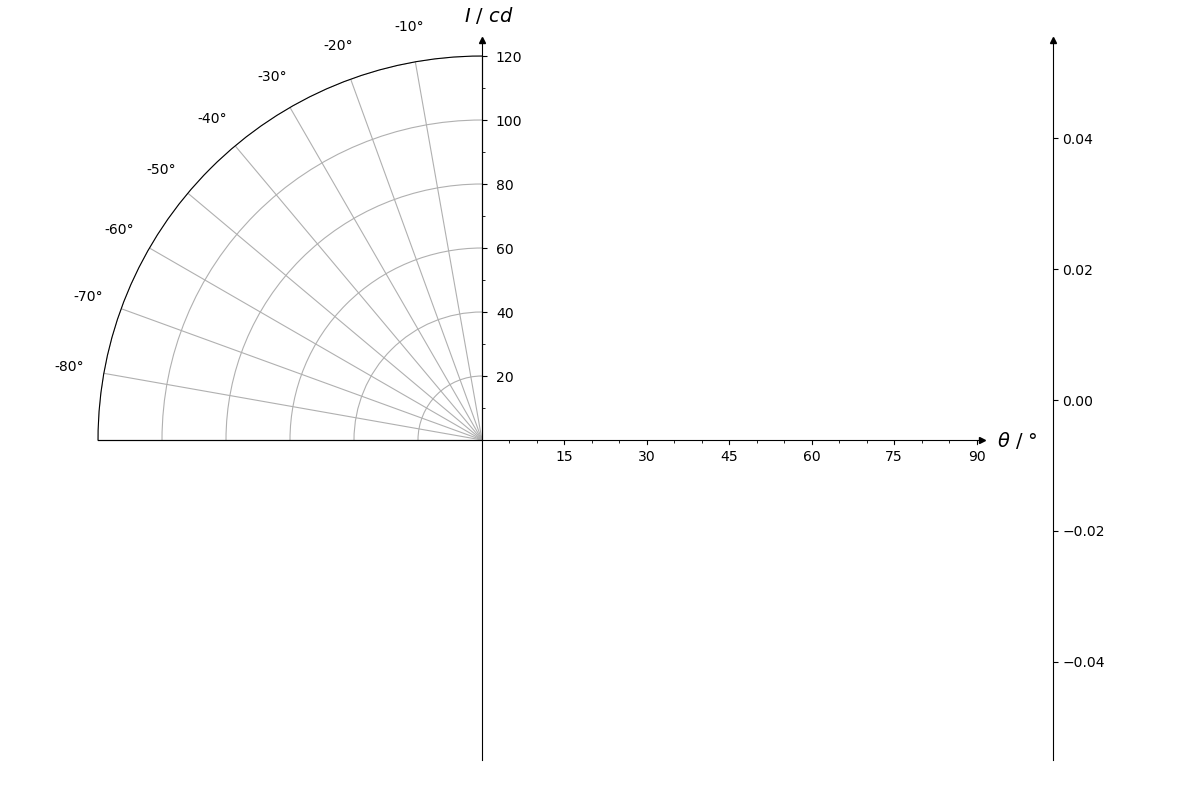

In [8]:
import matplotlib.pyplot as plt
from HalfplaneVisualization import HalfplaneVisu

visu = HalfplaneVisu(theta_max=theta_max,theta_tick_dist=15,r_max = 125,r_min=-100)
visu.show_fig(True, True)

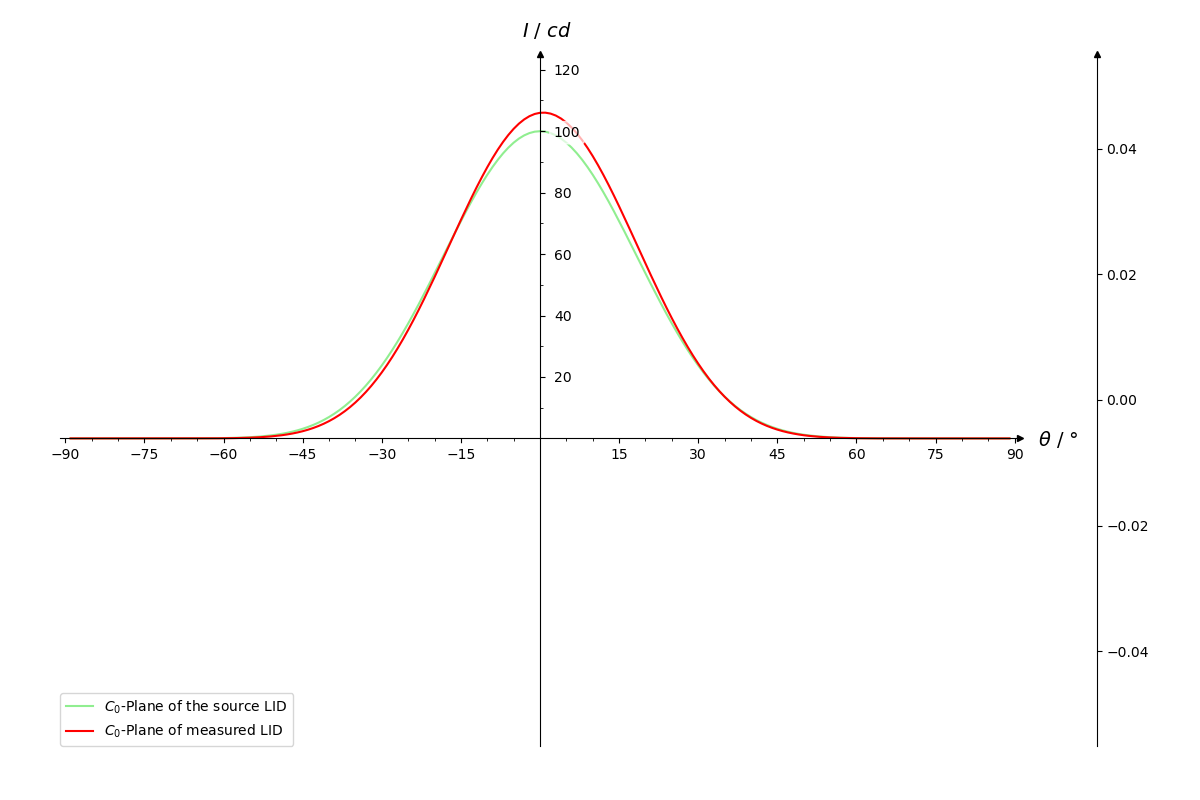

In [9]:
# choose the c-plane to plot
c = 0 

visu.plot(theta_cplane, LID_source_cplane[c], label=r'$C_0$-Plane of the source LID', c='lightgreen')
visu.plot(theta_cplane, LID_amplified_cplane[c], label=r'$C_0$-Plane of measured LID', c='red')

visu.show_fig(cart=True, polar=False)

Since it's hard to reason about the error from this plot, it is better to plot the actual Error. For this purpose one can use the auxilary axis on the right. the method aux_set_center(c) aligns the given value on the axis with the origin of the luminous intensity axis. By default it is centered at zero.

* Error is plotted as Percent of: I0 or I

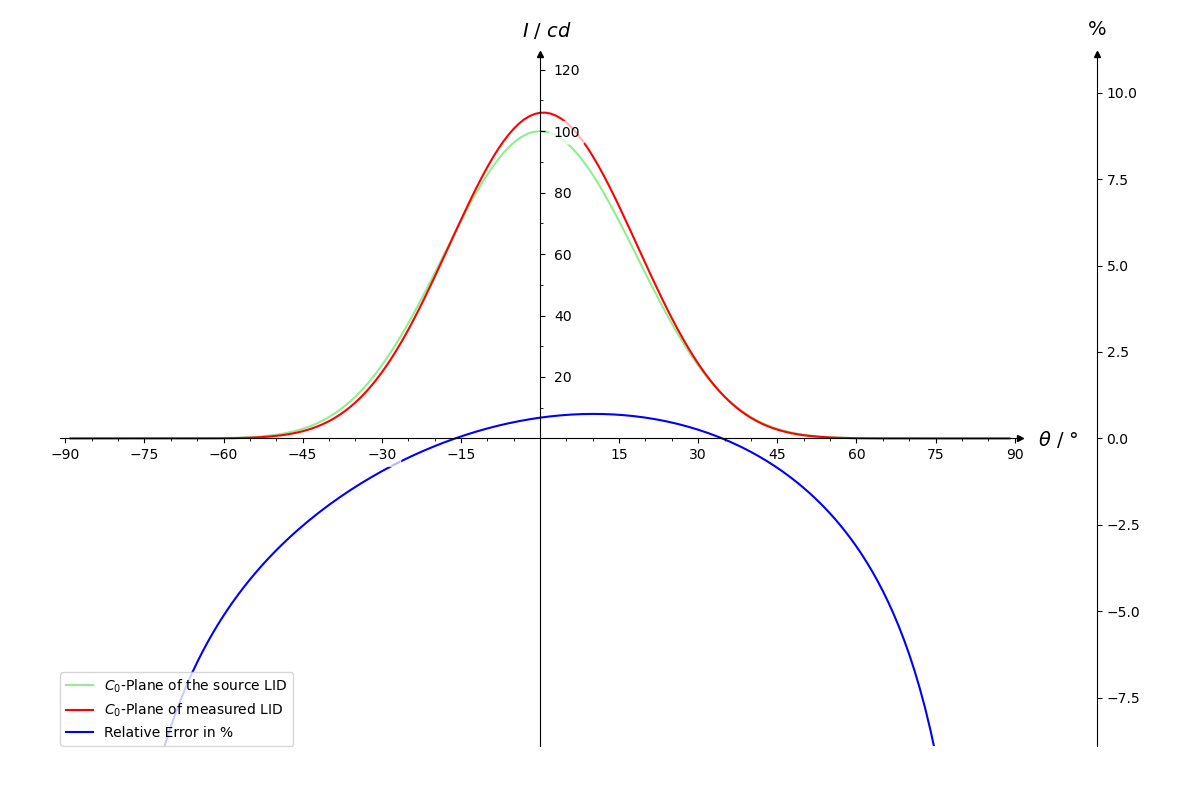

In [10]:
# calculate the relative error between luminous intensity of source and measurement in percent
error_rel_prcnt = 100 * (LID_measurement - LID_source) / LID_source
error_rel_prcnt_cplane = half2cplanes(error_rel_prcnt,theta,phi)[0]


visu.plot_aux(theta_cplane, error_rel_prcnt_cplane[c], label=r'Relative Error in %', c='blue')
visu.aux_set_label('%')
visu.show_fig(cart=True, polar=False)

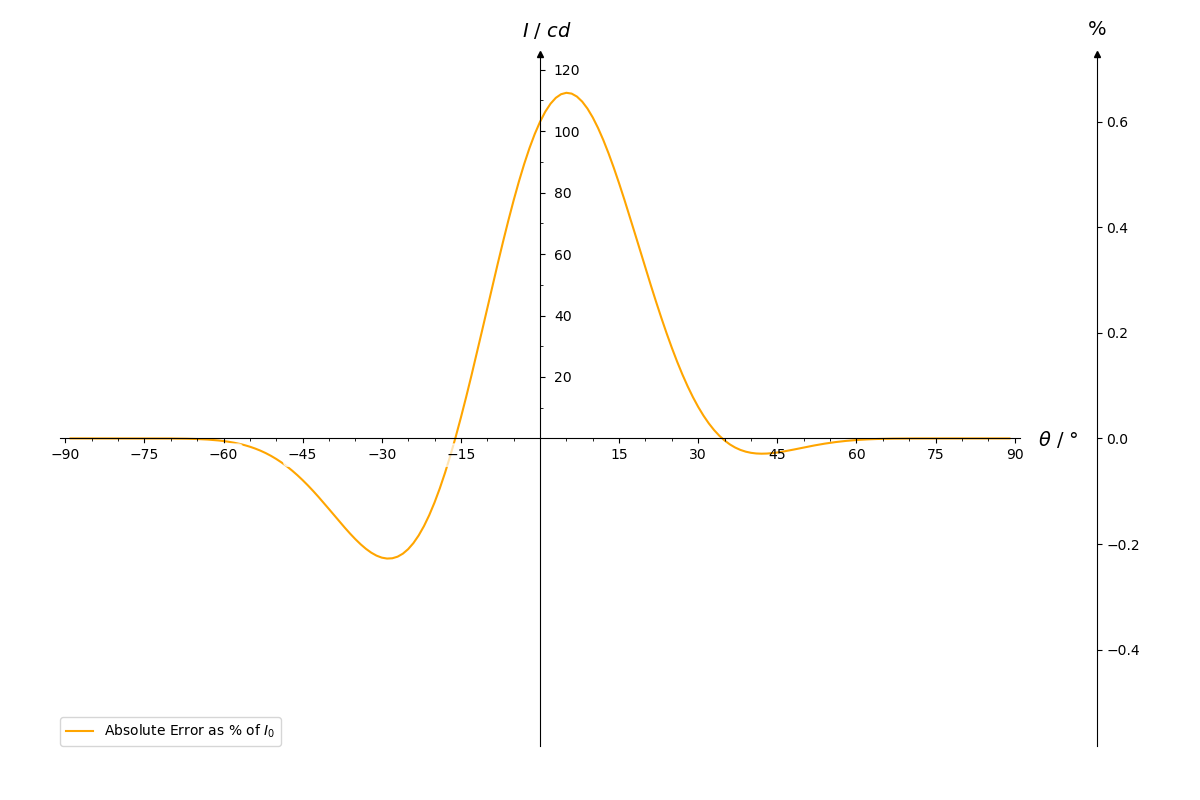

In [11]:
# calculate the absolute error as % of the luminous intensity along the optical axis
error_abs_prcnt = 100 * (LID_measurement - LID_source) / LID_source[0,0]
error_abs_prcnt_cplane = half2cplanes(error_abs_prcnt,theta,phi)[0]

visu.clear_aux()
visu.plot_aux(theta_cplane, error_abs_prcnt_cplane[c], label=r'Absolute Error as % of $I_0$', c='orange')
visu.show_fig(cart=True, polar=False)

Now the plot is extended to make it interactive. For this purpose we define a function, that takes the user intput and recalcualtes the model and adjusts the visualization.
The Offset of The Source is parametized, as well as its Cosine LID. Addidtionally the C-Plane to be shown can be selected. 
The function combines the the cells previously described.

In [22]:
from IPython.display import display

def update(x,y,z,c,n,amp,err,axes):
    # % to factor -> /100
    x_offset, y_offset, z_offset = np.array((x,y,z)) / 100
    # update the source LID
    LID_source_function = cosn_LID_generator(n)
    LID_source = LID_source_function(theta, phi)
    LID_source_cplane, theta_cplane, phi_cplane = half2cplanes(LID_source, theta, phi)
    # recalculate model
    LID_measurement = goniometer_model(x_offset, y_offset, z_offset, LID_source_function, theta, phi)[1]
    LID_amplified = LID_source + amp * (LID_measurement - LID_source)
    LID_amplified_cplane = half2cplanes(LID_amplified, theta, phi)[0]
    # recalculate error
    if 'rel' in err.lower():
        error_prcnt = 100 * (LID_measurement - LID_source) / LID_source
        error_label = r'Relative Error in %'
    else:
        error_prcnt = 100 * (LID_measurement - LID_source) / LID_source[0,0]
        error_label = r'Absolute Error as % of $I_0$'
    error_prcnt_cplane = half2cplanes(error_prcnt,theta,phi)[0]

    # plot / update the curves
    visu.plot(theta_cplane, LID_source_cplane[c], label=r'$C_0$-Plane of the source LID', c='lightgreen')
    visu.plot(theta_cplane, LID_amplified_cplane[c], c='red', label=r'$C_0$-Plane of measured LID')

    visu.clear_aux()
    visu.plot_aux(theta_cplane, error_prcnt_cplane[c], label=error_label, c='orange')

    # display the result in the chosen coordinate system
    cart = True if 'cart' in axes.lower() else False
    polar = True if 'polar' in axes.lower() else False
    visu.show_fig(cart=cart, polar=polar)

The next cell defines the UI for parametrization. Its made up of Sliders, which are linked to the previously defined update function with the 'interactive_output' call.

In [23]:
%matplotlib inline
from ipywidgets import interactive_output, IntSlider, FloatSlider, SelectionSlider, ToggleButtons, HBox, VBox, Label, Output
c_max = np.size(phi_cplane)-1 # maximum index for c-plane-array
phi_deg_cplane = np.rint(np.rad2deg(phi_cplane.squeeze())).astype(int)
x_slider = FloatSlider(min=-0.5, max=0.5, step=0.05, value=0.0, continuous_update=False)
y_slider = FloatSlider(min=-0.5, max=0.5, step=0.05, value=0.0, continuous_update=False)
z_slider = FloatSlider(min=-0.5, max=0.5, step=0.05, value=0.1, continuous_update=False)
c_slider = IntSlider  (min= 0, max=c_max, continuous_update=False, readout=False )
# Add an Output for the C-Plane Angle in Degrees
c_angle_output = Label("{:03}°".format(phi_deg_cplane[c_slider.value]))
c_slider.observe(lambda val: setattr(c_angle_output, 'value', "{:03}°".format(phi_deg_cplane[c_slider.value])), names='value')
n_slider = IntSlider  (min= 1, max=120, continuous_update=False)
amp_slider = FloatSlider(min=1, max=100, step=1, value=1, continuous_update=False)
error_toggle = ToggleButtons(options=['Relative', 'Absolute'],description='Error Representation:')
visu_style_toggle = ToggleButtons(options=['Cartesian', 'Polar', 'Cartesian & Polar'],description='Axes Style:')

ui = VBox([HBox([Label('X-Offset as % of Measurement Distance'), x_slider]),
           HBox([Label('Y-Offset as % of Measurement Distance'), y_slider]),
           HBox([Label('Z-Offset as % of Measurement Distance'), z_slider]),
           HBox([Label('Source LID Cosine Power'), n_slider]),
           HBox([Label('C-Plane Index'), c_slider,c_angle_output]),
           HBox([Label('Error Amplification'), amp_slider]),
           error_toggle,
           visu_style_toggle])

out = interactive_output(update, {'x': x_slider, 'y': y_slider, 'z': z_slider, 'c': c_slider, 'n': n_slider,
                                  'amp': amp_slider, 'err':error_toggle, 'axes':visu_style_toggle})
display(ui, out)

Output()

Explore different settings.
Results:
Error gets larger for bigger offsets (or smaller measurement distances)
Error increases with higher gradient (higher n)
different behavior for x,y and z offset

interesting case: 


The Z-position of the LC is generally hard to estimate. Even given a rotational symmetry there is no indicator where the LC should be assumed along the optical axis.

One assumption to make is that the LC is inside the housing. Does not have to be the case - e.g. highly focusing optics
standard procedure is often to position the object with the (Austrittsfläche) at the origin
that can result in a substantial offset of the LC along the z-axis
again visualize deformation, at first with same translation distance, comparable to X/Y-deformation


## Uncertainty analysis
For every measured direction it samples the illumincance caused by the source in a certain distance and derives from this the luminous intensity. Each of these measurements is individually afflicted with an uncertainty. The uncertainty is comprised of various contributions. They stem from the mechanical measurement setup, the sensor and are also effected by the object to be measured.
It is an ongoing effort to better model the uncertainty of photogoniometric measurements. Currently most measurements lack an uncertainty evaluation entirely, which complicates a comparison of measurements.
The uncertainty contribution of the sensor, either photometer or camera-based, can already be modelled. The same is true for the uncertainty contribution from the manipulator, that is positioning and orienting the source or detector. Since the location and orientation of the object placed on the goniometer is unknown, the uncertainty of the manipulator pose cannot be propagated to the source and its luminous intensity distribution and then further through the sensor system. This is a missing link in the uncertainty chain, that prevents a proper uncertainty evaluation. 

assign an uncertainty to this estimation:
* express confidence in LC
* also include confidence in the mounting accuracy.
* different uncertainty for each axis.
    * if object has prominent optical axis, with focusing optics: high uncertainty along optical axis, smaller uncertainty perpendicular
    * LC modelled as 3 independent variables, each with its own distribution
    * + formulas!
    * e.g. uniform or gaussian, more complex models are also possible.

- How can the uncertainty of the translation of the object be expressed?

If the offset of the source would be known, it could be corrected before as well as after the measurement. The position of the object needs to be assigned with a sensible uncertainty, which expresses the confidence in the correct placement. The paper discusses ways of modelling this uncertainty by simple means. 
The aforementioned model of the goniometer is then used to propagate the uncertainty of the position to an uncertainty of the LID.
+ model needs LID as input, not known for the object to be measured.
+ Propose a tool to calculate the uncertainty of an LID measurement, that uses the measurement result as an estimation of the underlying LID.

Give answers and derive guidelines that are applicable to far field measurements.
  


## Uncertainty Analysis

Now perform a uncertainty analysis with this model.
First create Distributions for the uncertain input parameters: the source location

In [12]:
# the mc simulation is computationally too expensive for the whole coordinate space.
# only simulate a reduced set of phi-angles
phi_mc_deg = np.linspace(start=0,stop=360,num=5)[:-1]
phi_mc = np.deg2rad(phi_mc_deg)[None,:]

We now need distributions for x,y,z instead of fixed values.
* Use Chaospy Package to define the distributions
* cp.Uniform(lower limit, upper limit)
* cp.Normal(mean, std deviation)

In [13]:
import chaospy as cp
# create the distributions for the location of the source

x_dist = cp.Uniform(-0.001, 0.001)
y_dist = cp.Uniform(-0.001, 0.001)
z_dist = cp.Uniform(-0.001, 0.001)

In [ ]:
import uncertainpy as un
import numpy as np
from Helperfunctions import polar2cart, cart2polar
# run a montecarlo uncertainty quantification
if __name__ == '__main__':
    model = un.Model(run=goniometer_model)
    parameters = {"x_s": x_dist, "y_s": y_dist,"z_s": z_dist,
                  "LID": LID_source_function, "theta_c": theta, "phi_c": phi_mc}
    UQ = un.UncertaintyQuantification(model=model, parameters=parameters)
    UQ.quantify(method='mc', plot=None, save=False, nr_mc_samples=2**10, CPUs=4)
    UQ.data['goniometer_model'].pop('evaluations')

In [20]:
# save the result
fname = 'mc_test'
#UQ.save(filename=fname, folder="test")

Plotting the result of the Uncertainty analysis:
Expanded Uncertainty: coverage factor k=2 -> 95% Confidence interval


In [15]:
results = UQ.data['goniometer_model']
mean = np.array(results['mean'])
std = np.sqrt(np.array(results['variance']))
# enlarge the confidence region to make it visible
amp = 10
u_band_low = mean - 2 * std * amp
u_band_high = mean + 2 * std * amp
# restructure data to c-planes
mean_cplanes, theta_cplane, phi_mc_cplane   = half2cplanes(mean,theta,phi_mc)
u_band_low_cplanes   = half2cplanes(u_band_low,theta,phi_mc)[0]
u_band_high_cplanes  = half2cplanes(u_band_high,theta,phi_mc)[0]


In [16]:
# visu for Monte Carlo Results

visu_mc = HalfplaneVisu(theta_max=theta_max,theta_tick_dist=15,r_max = 125,r_min=-50)

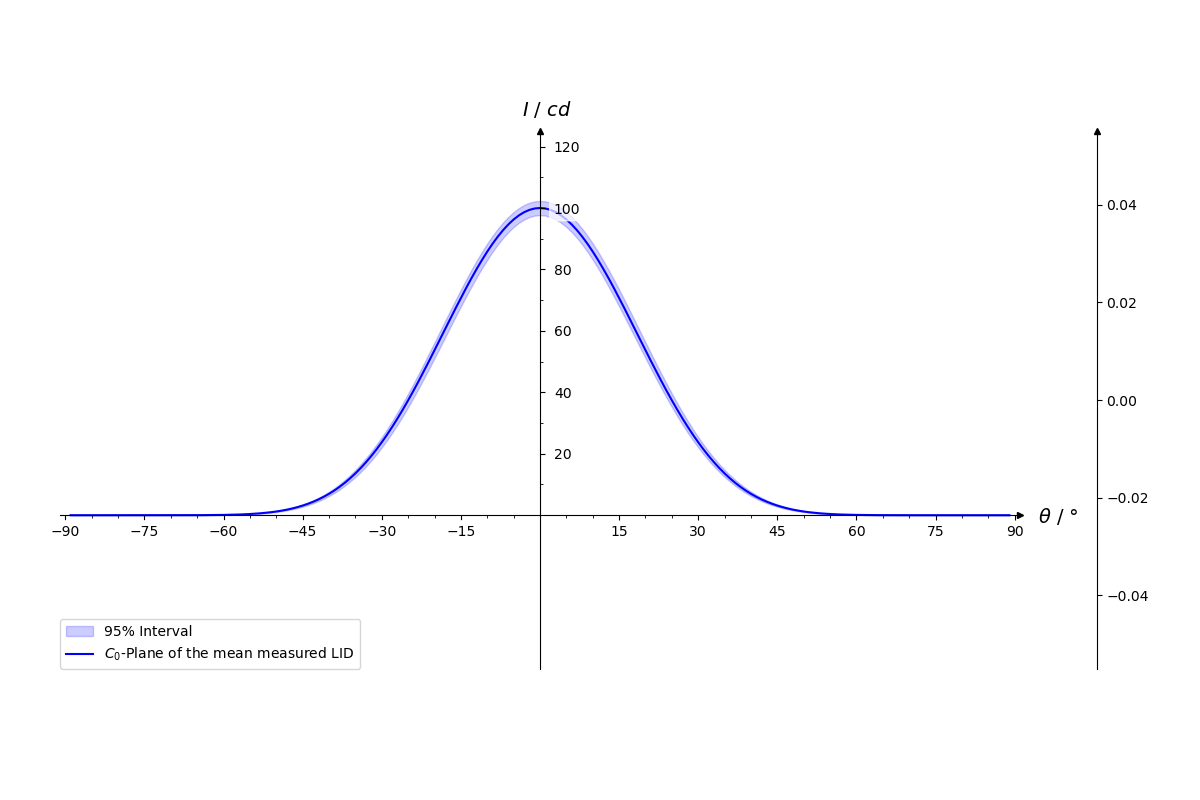

In [17]:
c = 0

visu_mc.plot(theta_cplane, mean_cplanes[c],label=r'$C_0$-Plane of the mean measured LID', color='blue')
visu_mc.fill(theta_cplane,u_band_low_cplanes[c],u_band_high_cplanes[c], label='95% Interval', color='blue')
visu_mc.show_fig(cart=True, polar=False)

* Add Plot of absolute / Relative uncertainty
* k = 2 -> multiplier for Standard Deviation 

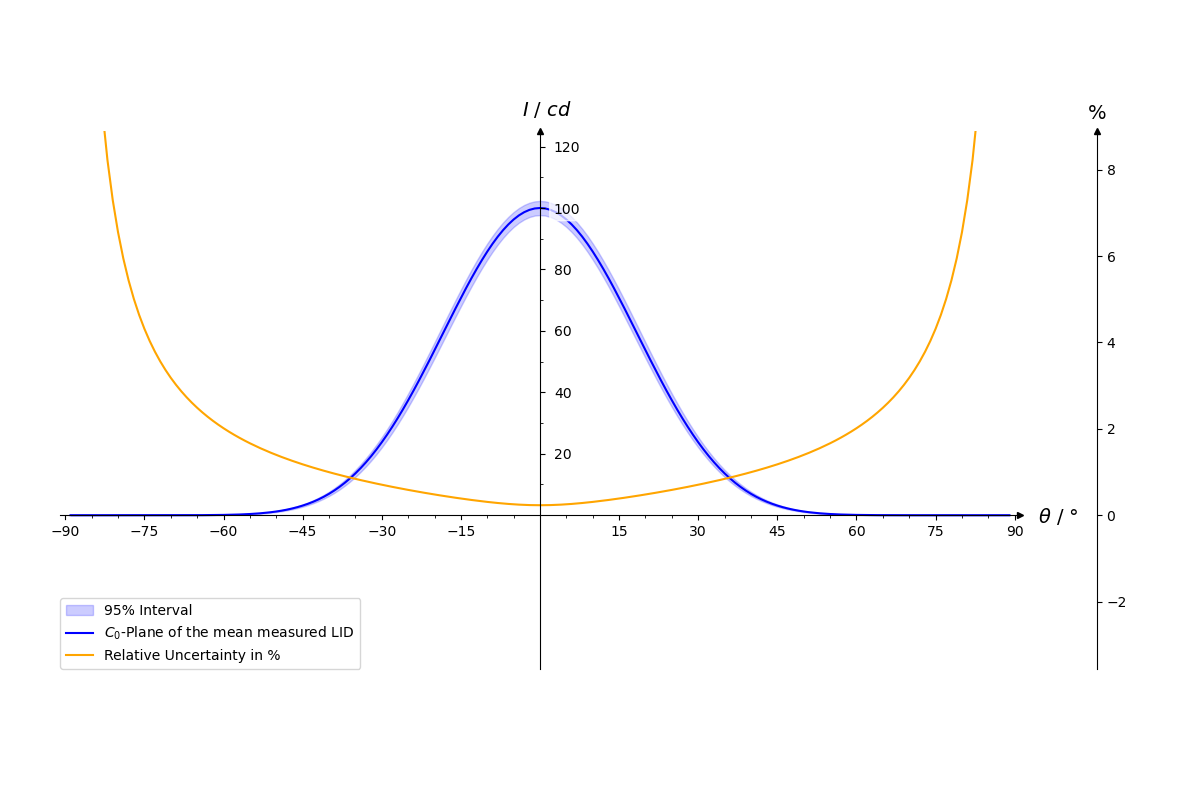

In [18]:
# Relative representation of the Uncertainty
u2_rel_prcnt = std * 200 / mean
u2_rel_prcnt_cplanes  = half2cplanes(u2_rel_prcnt,theta,phi_mc)[0]

visu_mc.aux_set_label('%')
visu_mc.plot_aux(theta_cplane, u2_rel_prcnt_cplanes[c],label=r'Relative Uncertainty in %', color='orange')
visu_mc.show_fig(cart=True, polar=False)

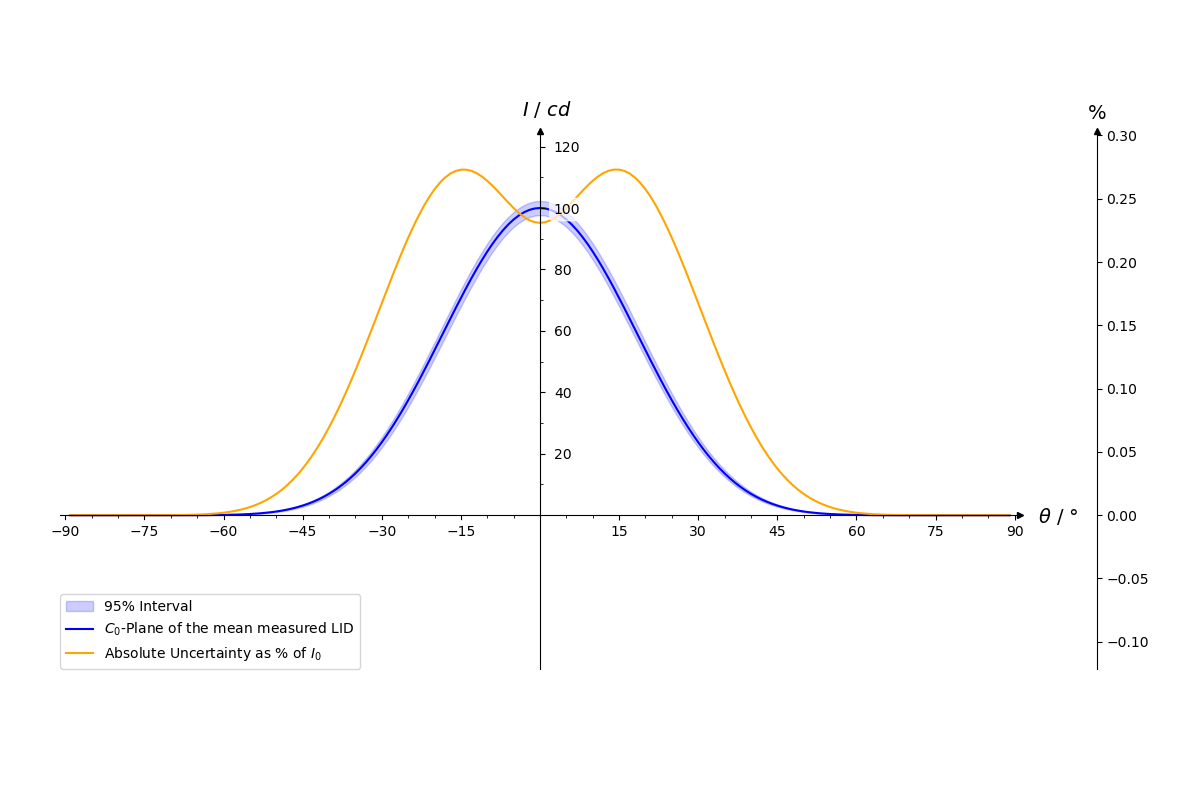

In [19]:
u2_abs_prcnt = std * 200 / mean[0,0]
u2_abs_prcnt_cplanes  = half2cplanes(u2_abs_prcnt,theta,phi_mc)[0]

visu_mc.clear_aux()
visu_mc.plot_aux(theta_cplane, u2_abs_prcnt_cplanes[c],label=r'Absolute Uncertainty as % of $I_0$', color='orange')
visu_mc.show_fig(cart=True, polar=False)

This can again easily made interactive. The update function has similar parameters as before. The parameters x,y,z previously describing an offset now discribe a distribution. For simplicity this distribution will be described by a single value. The distribution are all Normal distributions that are centered around zero. The parameter describe the spread of this distribution expressed as two standard deviations, to be consistent with the 95% interval. The value is again described as a percentage of the measurement distance. 
The value is again given as a % of measurement distance. 

In case the offset or the LID-parameter is changed, the simulation has to run again, which is very slow. Other changes are possible without resimulation. Because of this the update function can be called in two capacities: if all necessary parameters are provided, it runs the simulation, updates the plot and displays it. Otherwhise it it skips the simulation and uses the last available data.
The interface is constructed similarly as for the error analysis above. This time there is an additional button to start the simulation. This button gets assigned a callback function that is executed when the button is pressed.

In [20]:
def update_mc(c, amp, u, style, x=None, y=None, z=None, n=None):
    if not None in (x,y,z,n): # all necessary simulation parameters were supplied
        # percent to factor -> /100
        # 95% to std -> /2
        x_dist = cp.Normal(0, x/200)
        y_dist = cp.Normal(0, y/200)
        z_dist = cp.Normal(0, z/200)
        # update the source LID
        LID_source_function = cosn_LID_generator(n)
        parameters = {"x_s": x_dist, "y_s": y_dist,"z_s": z_dist,
                      "LID": LID_source_function, "theta_c": theta, "phi_c": phi_mc}
        UQ.parameters = parameters
        UQ.quantify(method='mc', plot=None, save=False, nr_mc_samples=2**10, CPUs=4)
        UQ.data['goniometer_model'].pop('evaluations')

    results = UQ.data['goniometer_model']
    
    mean = np.array(results['mean'])
    mean_cplanes, theta_cplane, phi_mc_cplane   = half2cplanes(mean,theta,phi_mc)
    visu_mc.plot(theta_cplane, mean_cplanes[c],label=r'$C_0$-Plane of the mean measured LID', color='blue')
    
    # calculate confidence region, amplification for better visibility
    std = np.sqrt(np.array(results['variance']))
    u_band_low = mean - 2 * std * amp
    u_band_high = mean + 2 * std * amp
    u_band_low_cplanes   = half2cplanes(u_band_low,theta,phi_mc)[0]
    u_band_high_cplanes  = half2cplanes(u_band_high,theta,phi_mc)[0]
    visu_mc.fill(theta_cplane,u_band_low_cplanes[c],u_band_high_cplanes[c], label='95% Interval', color='blue')
    
    # calculate uncertainty plots
    if 'rel' in u.lower():
        u2_prcnt = std * 200 / mean
        u2_label = r'Relative extended Uncertainty in %'
    else:
        u2_prcnt = std * 200 / mean[0,0]
        u2_label = r'Absolute extended Uncertainty as % of $I_0$'
    u2_prcnt_cplanes  = half2cplanes(u2_prcnt,theta,phi_mc)[0]

    visu_mc.clear_aux()
    visu_mc.plot_aux(theta_cplane, u2_prcnt_cplanes[c],label=u2_label, color='orange')

    # display the result in the chosen coordinate system
    cart = True if 'cart' in style.lower() else False
    polar = True if 'polar' in style.lower() else False
    visu_mc.show_fig(cart=cart, polar=polar)

In [26]:
%matplotlib inline
from ipywidgets import Button, Output, fixed
c_max = np.size(phi_mc_cplane)-1 # maximum index for c-plane-array
phi_mc_deg_cplane = np.rint(np.rad2deg(phi_mc_cplane.squeeze())).astype(int)
x_slider = FloatSlider(min=0, max=2, step=0.05, value=0.2, continuous_update=False)
y_slider = FloatSlider(min=0, max=2, step=0.05, value=0.2, continuous_update=False)
z_slider = FloatSlider(min=0, max=2, step=0.05, value=0.2, continuous_update=False)
c_slider = IntSlider  (min= 0, max=c_max, continuous_update=False, readout=False)
c_angle_output = Label("{:03}°".format(phi_mc_deg_cplane[c_slider.value]))
c_slider.observe(lambda val: setattr(c_angle_output, 'value', "{:03}°".format(phi_mc_deg_cplane[c_slider.value])), names='value')
n_slider = IntSlider  (min= 1, max=120, value=n, continuous_update=False)
amp_Slider = FloatSlider(min=1, max=10, step=0.1, value=amp, continuous_update=False)
u_toggle = ToggleButtons(options=['Relative', 'Absolute'],description='Uncertainty Representation:')
visu_style_toggle = ToggleButtons(options=['Cartesian', 'Polar', 'Cartesian & Polar'],description='Axes Style:',)
run_button = Button(description="Start Simulation")

ui = VBox([HBox([Label('X-Direction one-sided expanded Uncertainty as % of Measurement Distance'), x_slider]),
           HBox([Label('Y-Direction one-sided expanded Uncertainty as % of Measurement Distance'), y_slider]),
           HBox([Label('Z-Direction one-sided expanded Uncertainty as % of Measurement Distance'), z_slider]),
           HBox([Label('Source LID Cosine Power'), n_slider]),
           run_button,
           HBox([Label('C-Plane Index'), c_slider, c_angle_output]),
           HBox([Label('Uncertainty Amplification'), amp_Slider]),
           u_toggle,
           visu_style_toggle])

out = interactive_output(update_mc, {'c': c_slider, 'amp': amp_Slider, 'u':u_toggle, 'style': visu_style_toggle}) 
def run_simulation(b):
    out.clear_output()
    with out:
        update_mc(c=c_slider.value, amp=amp_Slider.value, u=u_toggle.value, style=visu_style_toggle.value,
                  x = x_slider.value, y=y_slider.value, z=z_slider.value, n=n_slider.value )
run_button.on_click(run_simulation)
display(ui,out)

Output()